/tmp/ipython-input-1060358803.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range(start='2024-01-01', periods=40, freq='M')   # 40 months


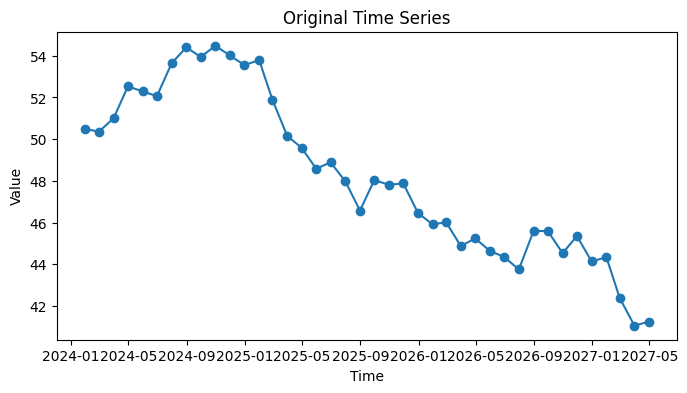

In [8]:
# ===============================
# ARIMA MODEL STEP-BY-STEP DEMO
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# -------------------------------
# 1️⃣  Create sample time series data
# -------------------------------
np.random.seed(42)
time = pd.date_range(start='2024-01-01', periods=40, freq='M')   # 40 months
values = np.cumsum(np.random.randn(40)) + 50  # Trend + noise

data = pd.DataFrame({'Time': time, 'Value': values})

df=data
# Plot the time series
plt.figure(figsize=(8, 4))
plt.plot(df['Time'],data['Value'], marker='o')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()









In [9]:
# -------------------------------
# 2️⃣  Check stationarity using ADF Test
# -------------------------------
result = adfuller(data['Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("\n❌ Series is NOT stationary — differencing needed.")
else:
    print("\n✅ Series is stationary — no differencing needed.")

ADF Statistic: 0.21664727511563486
p-value: 0.9731799839385175

❌ Series is NOT stationary — differencing needed.


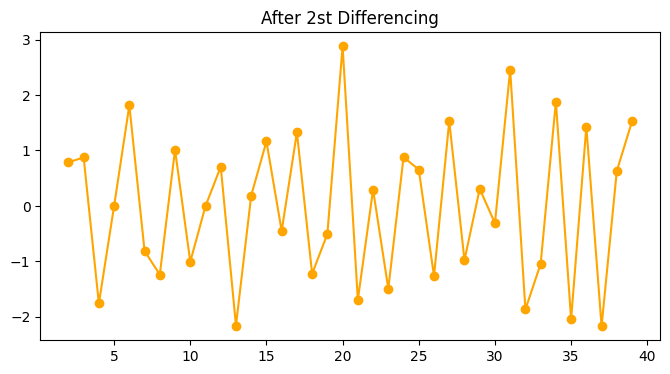


After 2st differencing:
ADF Statistic: -3.6803628076678265
p-value: 0.004398002381871074
✅ Series is stationary after 2st differencing → d = 2


In [10]:
# -------------------------------
# 3️⃣  Differencing (find d)
# -------------------------------
data_diff = data['Value'].diff().diff().dropna()

plt.figure(figsize=(8, 4))
plt.plot(data_diff, color='orange', marker='o')
plt.title('After 2st Differencing')
plt.show()

# Recheck stationarity
result_diff = adfuller(data_diff)
print('\nAfter 2st differencing:')
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

if result_diff[1] < 0.05:
    print("✅ Series is stationary after 2st differencing → d = 2")
    d = 1
else:
    print("❌ Still not stationary → consider more differencing")
    d = 2

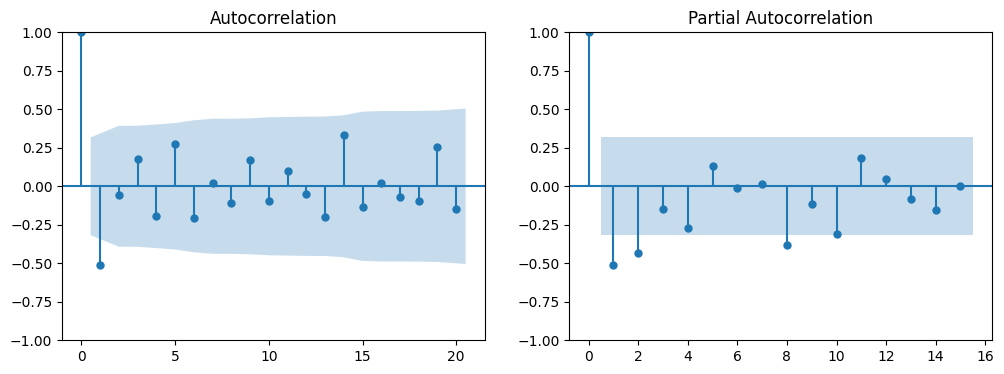

In [11]:
# -------------------------------
# 4️⃣  ACF & PACF to find p and q
# -------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data_diff, ax=ax[0], lags=20)
plot_pacf(data_diff, ax=ax[1], lags=15)
plt.show()

# 👀 Visual Interpretation (You can tweak p and q)
# Example: If PACF cuts off after lag 1 → p=1
#          If ACF cuts off after lag 1 → q=1
p, q = 1, 1

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   40
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -53.799
Date:                Mon, 03 Nov 2025   AIC                            113.598
Time:                        17:35:23   BIC                            118.511
Sample:                             0   HQIC                           115.346
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1184      0.272     -0.435      0.664      -0.652       0.416
ma.L1         -0.8165      0.155     -5.284      0.000      -1.119      -0.514
sigma2         0.9603      0.241      3.981      0.0

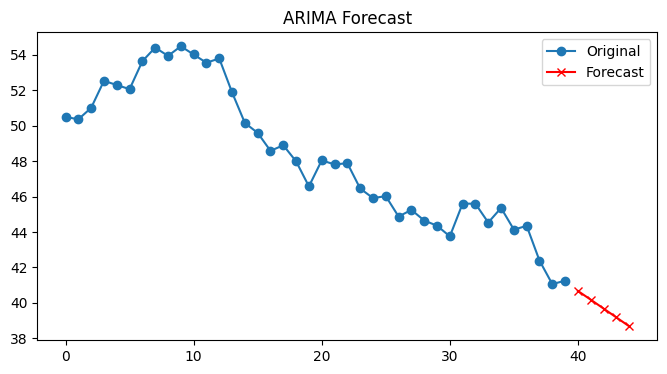

In [14]:
# -------------------------------
# 5️⃣  Fit ARIMA Model
# -------------------------------
model = ARIMA(data['Value'], order=(1, 2, 1))
model_fit = model.fit()

print(model_fit.summary())

# -------------------------------
# 6️⃣  Forecast next few points
# -------------------------------
forecast = model_fit.forecast(steps=5)
print("\nNext 5 predicted values:")
print(forecast)

# Plot original + forecast
plt.figure(figsize=(8, 4))
plt.plot(data['Value'], label='Original', marker='o')
plt.plot(forecast.index, forecast, label='Forecast', marker='x', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()